# Graph Mining Lab02 (220920)

# ✅ 실습파일 제출안내
- Task : 아이캠퍼스에서 실습용 파일 다운 받아서, 빈칸 채우기
- 파일명: lab02-학번.ipynb
- 아이캠퍼스에 제출
- 기한: 금일 자정까지 (00:00)

# ✅ [3주차] 수업 내용
### 1. Network Property : 네트워크의 특징을 이해하기 위한 대표 지표들
    - Degree
    - Path 
    - Diameter (Average Path Length)
    - Clustering Coefficient
    - Connectivity
### 2. Random Graph
    - 네트워크의 특징을 비교하기 위한 베이스라인으로 사용.
    - Erodos-Renyi Random Graph
### 3. Small World Model
    - Real world 네트워크의 특성 반영.
    - Low average path length & high clustering coefficient
    - Watts_strogatz_graph

# ✅ [Lab02] 실습 구성
1. 수업 내용 실습 
    - NetworkX를 이용한 그래프 생성
    - Network Property 출력
    - Random Graph 생성
    - Small World Model 생성
2. Graph Visualization
    - Graph 시각화 (Benchmark 데이터 & NetworkX)
    - Large Graph 시각화 (외부 데이터 & Gephi)

---

# [Environment Setting]

In [1]:
# Install DGL library
!pip install -q dgl-cu113 dglgo -f https://data.dgl.ai/wheels/repo.html

     |████████████████████████████████| 239.1 MB 18 kB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 281 kB 39.2 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 103 kB 72.1 MB/s 
     |████████████████████████████████| 51 kB 824 kB/s 
     |████████████████████████████████| 109 kB 58.7 MB/s 
     |████████████████████████████████| 36.8 MB 42 kB/s 
     |████████████████████████████████| 41 kB 517 kB/s 
     |████████████████████████████████| 3.2 MB 46.9 MB/s 
     |████████████████████████████████| 546 kB 53.2 MB/s 
     |████████████████████████████████| 90 kB 10.0 MB/s 
     |████████████████████████████████| 121 kB 83.4 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 100 kB 11.3 MB/s 


In [2]:
import dgl
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


---

# [Lab01 Review] : DGL 그래프 생성 및 시각화

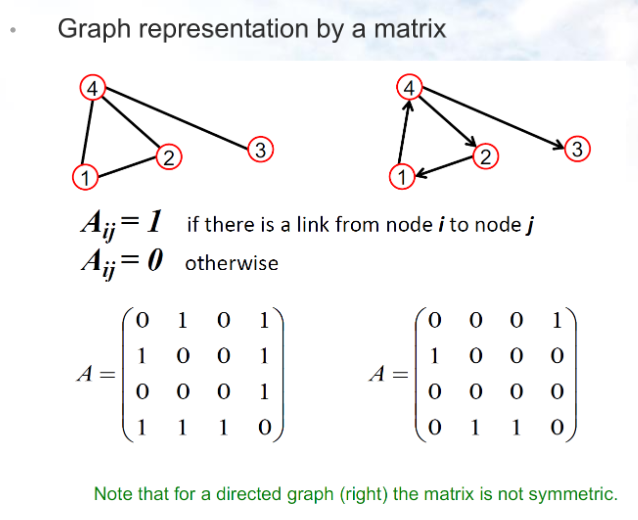

##  그래프 정의 방법 1 : 출발 노드 번호, 도착 노드 번호 지정

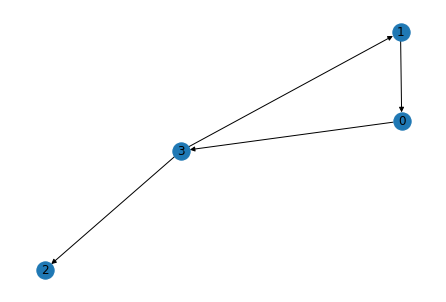

In [3]:
# Create a graph
u, v = torch.tensor([0, 1, 3, 3]), torch.tensor([3, 0, 1, 2])
g = dgl.graph((u, v))

# Visualization (NetworkX)
nx_G = dgl.to_networkx(g)
nx.draw(nx_G, with_labels=True)

## 그래프 정의 방법 2 : 인접 노드 행렬 초기화


== Adjacency matrix: 
 tensor([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 1, 0]])
== adj to edge list: 
 tensor([[0, 1, 3, 3],
        [3, 0, 1, 2]])


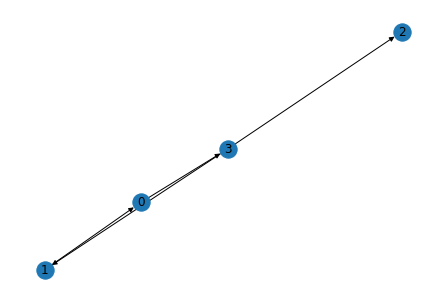

In [4]:
# Define adjacency matrix
adj = torch.tensor([[0,0,0,1],[1,0,0,0],[0,0,0,0],[0,1,1,0]])
print("== Adjacency matrix: \n", adj)
adj_t = torch.nonzero(adj).T
print("== adj to edge list: \n", adj_t)

# Create a graph
u,v = adj_t[0], adj_t[1]
g = dgl.graph((u, v))

# Visualization  (NetworkX)
nx_G = dgl.to_networkx(g)
nx.draw(nx_G, with_labels=True)

## 3. Heterogeneous Graph
- Node type이 두 개 이상인 그래프를 의미. 
- Node type이 여러 개임에 따라 연결되는 Edge의 형태도 다양함.

In [5]:
graph_data = {
   ('user', 'play', 'game'): (torch.tensor([0,0,1,1,1,2]), torch.tensor([1,2,0,2,3,2])),
   ('user', 'follow', 'user') : (torch.tensor([0,0,0,1,1,2,3,3]), torch.tensor([1,2,4,2,3,3,4,1]))
}

g = dgl.heterograph(graph_data)
print(g)
print("== Node types: ",g.ntypes)
print("== Edge types: ",g.etypes)
print("== Typical edge types  : ",g.canonical_etypes)

Graph(num_nodes={'game': 4, 'user': 5},
      num_edges={('user', 'follow', 'user'): 8, ('user', 'play', 'game'): 6},
      metagraph=[('user', 'user', 'follow'), ('user', 'game', 'play')])
== Node types:  ['game', 'user']
== Edge types:  ['follow', 'play']
== Typical edge types  :  [('user', 'follow', 'user'), ('user', 'play', 'game')]


### 이때, dgl.to_networkx는 homogeneous 그래프에 대해서만 가능

== Node types:  ['game', 'user']
== Node type of each node:  tensor([0, 0, 0, 0, 1, 1, 1, 1, 1])
== # of nodes:  9


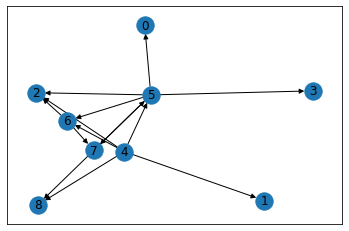

In [6]:
# Change heterogeneous graph to homogeneous graph 
g_hete2homo = dgl.to_homogeneous(g)

print("== Node types: " ,g.ntypes)
print("== Node type of each node: ", g_hete2homo.ndata[dgl.NTYPE])
print("== # of nodes: ", g_hete2homo.num_nodes())

nx_hete2homo = dgl.to_networkx(g_hete2homo)
nx.draw_networkx(nx_hete2homo)

이 경우 노드가 모두 같은 색으로 표기되어 구분이 어려움!

---

# ✅ NetworkX
- 보다 복잡한 그래프 시각화 가능.
- 다양한 Network Property 관련 함수 제공.
- 오늘은 Networkx를 이용한 그래프를 정의하여 다양한 실습을 해봅시다~!

# 1. NetworkX Graph 생성 및 시각화

## 1-1. NetworkX 그래프 정의

In [7]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

False
True


## 1-2. Add Node

In [8]:
# Add one node 
G.add_node(0)
# Add one node with node level attributes
G.add_node(0, feature=1, label=0)

In [9]:
# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 1, 'label': 0}


In [10]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2}),
  (3, {"feature": 3, "label": 3})
]) #(node, attrdict)

In [11]:
# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
    print(node)

(0, {'feature': 1, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
(3, {'feature': 3, 'label': 3})


In [12]:
# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

G has 4 nodes


## 1-3. Add Edge

In [13]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

In [14]:
# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [15]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1}),
  (3, 1, {"weight": 0.4})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges(data=True):
    print(edge)
    print(G.get_edge_data(edge[0], edge[1]))
    
# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1, {'weight': 0.5})
{'weight': 0.5}
(0, 2, {'weight': 0.1})
{'weight': 0.1}
(1, 2, {'weight': 0.3})
{'weight': 0.3}
(1, 3, {'weight': 0.4})
{'weight': 0.4}
G has 4 edges


## 1-4. Visualization

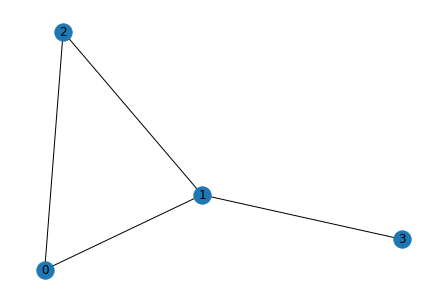

In [16]:
# Draw the graph
nx.draw(G, with_labels=True)

# 2. Network Property 출력
- Degree
- Path
- Diameter & Average Path Length
- Coefficient Clustering

## 2-1. Degree

In [17]:
node_id = 0

In [18]:
# Degree of node : G.degree[node_id]
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

Node 0 has degree 2


In [19]:
# Get neighbor of node : G.neighbors(node_id)
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 0 has neighbor 1
Node 0 has neighbor 2


## 2-2. Path

In [20]:
# Shortest Path between two nodes (0, 3)
print("The shortes path from {} to {} is {}".format(0, 3, nx.shortest_path(G, 0, 3)))

The shortes path from 0 to 3 is [0, 1, 3]


In [21]:
# Shortest Path between two nodes (0, 2)
print("The shortes path from {} to {} is {}".format(0, 2, nx.shortest_path(G, 0, 2)))

The shortes path from 0 to 2 is [0, 2]


In [22]:
# 각 node pair에 대한 shortest path 출력.
for source_id in G.nodes():
    for dest_id in range(source_id+1, G.number_of_nodes()):
        path = nx.shortest_path(G, source_id, dest_id)
        print("The shortest path from {} to {} is {}, \nlength: {}".format(
            source_id, dest_id, 
            nx.shortest_path(G, source_id, dest_id),
            len(nx.shortest_path(G, source_id, dest_id))-1))

The shortest path from 0 to 1 is [0, 1], 
length: 1
The shortest path from 0 to 2 is [0, 2], 
length: 1
The shortest path from 0 to 3 is [0, 1, 3], 
length: 2
The shortest path from 1 to 2 is [1, 2], 
length: 1
The shortest path from 1 to 3 is [1, 3], 
length: 1
The shortest path from 2 to 3 is [2, 1, 3], 
length: 2


## 2-3. Diameter / Avg Path Length

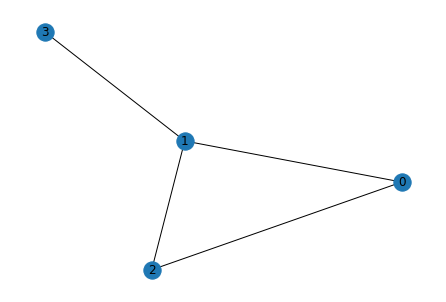

In [23]:
# Draw the graph
nx.draw(G, with_labels=True)

In [24]:
# Diameter for Graph (max-distance)
nx.diameter(G)

2

In [25]:
# Average Path Length
nx.average_shortest_path_length(G) # 8 / 6 = 1.33333

1.3333333333333333

## 2-4. Coefficient Clustering 
- 이웃 노드 간 평균 연결 정도

In [26]:
# Coefficient Clustering : nx.clustering(Graph, Node_id)
node_id = 0
print("Node {}'s clustering coefficient".format(node_id), nx.clustering(G, node_id))

Node 0's clustering coefficient 1.0


In [27]:
# Coefficient Clustering : nx.clustering(Graph, Node_id)
node_id = 1
print("Node {}'s clustering coefficient".format(node_id), nx.clustering(G, node_id))

Node 1's clustering coefficient 0.3333333333333333


In [28]:
# Coefficient Clustering for all nodes
print("Clustering Coefficient for All Node : ", nx.clustering(G))
print("Average Clustering Coefficient for G : ", nx.average_clustering(G))

Clustering Coefficient for All Node :  {0: 1.0, 1: 0.3333333333333333, 2: 1.0, 3: 0}
Average Clustering Coefficient for G :  0.5833333333333333


# 3. Baseline Graph 정의

## 3-1. Random Graph

In [29]:
# n : The number of nodes 
# p : Probability for edge creation 
n = 20
p = 0.5
random_G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

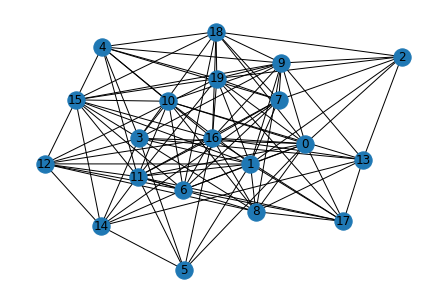

In [30]:
nx.draw(random_G, with_labels=True)

## 3-2. Small World Network
- Low average path length & high clustering coefficient


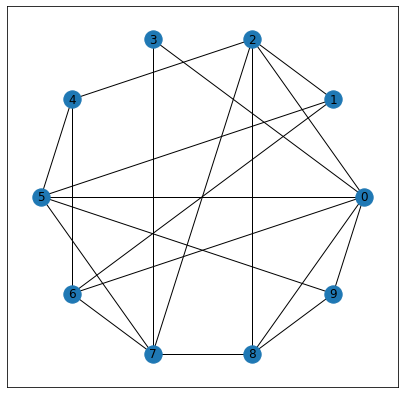

In [31]:
# watts_strogatz_graph
  # n : The number of nodes
  # k : Each node is joined with its k nearest neighbors in a ring topology.
  # p : The probability of rewiring each edge

G = nx.watts_strogatz_graph(n = 10, k = 5, p = 0.5)
pos = nx.circular_layout(G)
 
plt.figure(figsize = (7, 7))
nx.draw_networkx(G, pos)

# 4. Graph Visualization
- Benchmark Dataset : Karate Club Graph
- External Dataset : COVID-19

## 4-1. Benchmark Dataset
### Karate Club Graph 
- Node : 클럽 회원 (34명)
- Edge : 회원 간의 상호작용
- 두 개의 commnunity 존재 : Mr. Hi, Officier

In [ ]:
# Define Karate Club Graph
G = nx.karate_club_graph()

In [ ]:
G.nodes(data=True), G.number_of_nodes() # 34, two 'club' atrribute

(NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}}),
 34)

In [ ]:
G.edges(data=True), G.number_of_edges() # 78

(EdgeDataView([(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 5, {}), (0, 6, {}), (0, 7, {}), (0, 8, {}), (0, 10, {}), (0, 11, {}), (0, 12, {}), (0, 13, {}), (0, 17, {}), (0, 19, {}), (0, 21, {}), (0, 31, {}), (1, 2, {}), (1, 3, {}), (1, 7, {}), (1, 13, {}), (1, 17, {}), (1, 19, {}), (1, 21, {}), (1, 30, {}), (2, 3, {}), (2, 7, {}), (2, 8, {}), (2, 9, {}), (2, 13, {}), (2, 27, {}), (2, 28, {}), (2, 32, {}), (3, 7, {}), (3, 12, {}), (3, 13, {}), (4, 6, {}), (4, 10, {}), (5, 6, {}), (5, 10, {}), (5, 16, {}), (6, 16, {}), (8, 30, {}), (8, 32, {}), (8, 33, {}), (9, 33, {}), (13, 33, {}), (14, 32, {}), (14, 33, {}), (15, 32, {}), (15, 33, {}), (18, 32, {}), (18, 33, {}), (19, 33, {}), (20, 32, {}), (20, 33, {}), (22, 32, {}), (22, 33, {}), (23, 25, {}), (23, 27, {}), (23, 29, {}), (23, 32, {}), (23, 33, {}), (24, 25, {}), (24, 27, {}), (24, 31, {}), (25, 31, {}), (26, 29, {}), (26, 33, {}), (27, 33, {}), (28, 31, {}), (28, 33, {}), (29, 32, {}), (29, 33, {}), (30, 32, {}), (30, 33, {})

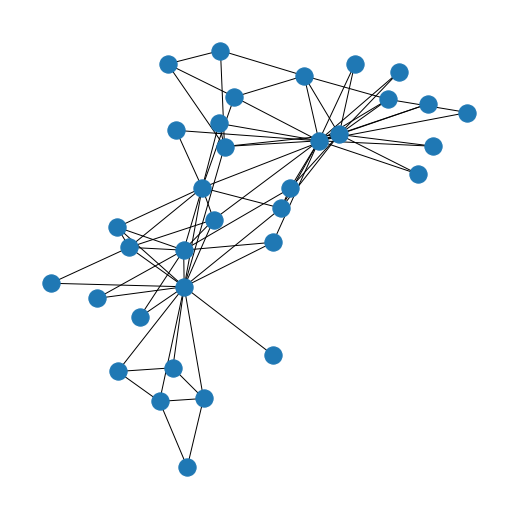

In [ ]:
# Visualization
pos = nx.spring_layout(G)
plt.figure(figsize=(7, 7))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'))
plt.show()

In [ ]:
# Community 별로 나누어 시각화 해보자! (node attribute ['club'] 활용.)
G = nx.karate_club_graph()
community_map = {}
for node in G.nodes(data=True):
    if node[1]["club"] == "Mr. Hi":
        community_map[node[0]] = 0
    else:
        community_map[node[0]] = 1

In [ ]:
node, node[1], node[1]['club'] # Assign Mr.Hi --> 0, Officier --> 1

((33, {'club': 'Officer'}), {'club': 'Officer'}, 'Officer')

In [ ]:
# 각 노드가 어떤 club 유형에 속하는지에 대한 map
# community_map

In [ ]:
# 각 클럽 별 색상 번호 지정
node_color = []
color_map = {0: 0, 1: 1}
node_color = [color_map[community_map[node]] for node in G.nodes()]

In [ ]:
# node_color

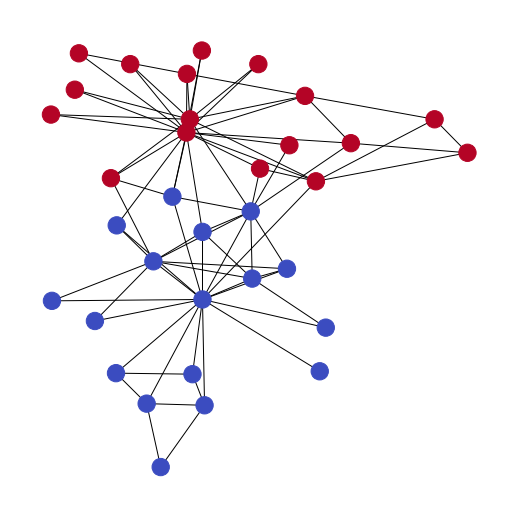

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(7, 7))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color)
plt.show()

## Can we add other information?

분열된 두 커뮤니티! 그럼 과연 커뮤니티 내 사람들끼리만 상호작용을 할까? --> edge type!

### Add Edge Type

In [ ]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [ ]:
for source_vs, target_vs in G.edges:
    # 두 회원이 같은 클럽인 경우
    if community_map[source_vs] == community_map[target_vs]:
        # Mr.Hi - Mr.Hi
        if community_map[source_vs] == 0:
            G.edges[source_vs, target_vs]['edge_type'] = "e0" 
        # Officier - Officier
        else:
            G.edges[source_vs, target_vs]['edge_type'] = "e1" 
    else:
    # 두 회원이 다른 클럽인 경우
        G.edges[source_vs, target_vs]['edge_type'] = "e2" # Mr.Hi - Officier

In [ ]:
# 각 엣지 쌍 별로 엣지의 타입이 할당되었음.
# G.edges(data=True)

In [ ]:
# Assign color for each edge types
edge_color = {}
for edge in G.edges(data=True):
    # Edges within club "Mr. Hi"
    n1, n2, _ = edge
    if edge[2]['edge_type'] == 'e0':
        edge_color[(n1, n2)] = 'blue'
    # Edges within club "Officer"
    elif edge[2]['edge_type'] == 'e1':
        edge_color[(n1, n2)] = 'red'
    # Edges between clubs
    else: # 'e2'
        edge_color[(n1, n2)] = 'green'

In [ ]:
# edge_color

In [ ]:
# Set edge attribute (apply!)
nx.classes.function.set_edge_attributes(G, edge_color, name='color')

In [ ]:
# Check attribute!
# G.edges(data=True)

## Add Node Type

In [ ]:
# Add node type!
for vs_id, club in community_map.items():
    G.nodes[vs_id]["node_type"] = "n0" if club == 0 else "n1"

In [ ]:
# 새로운 Node Attribute 'node_type' 
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi', 'node_type': 'n0'}, 1: {'club': 'Mr. Hi', 'node_type': 'n0'}, 2: {'club': 'Mr. Hi', 'node_type': 'n0'}, 3: {'club': 'Mr. Hi', 'node_type': 'n0'}, 4: {'club': 'Mr. Hi', 'node_type': 'n0'}, 5: {'club': 'Mr. Hi', 'node_type': 'n0'}, 6: {'club': 'Mr. Hi', 'node_type': 'n0'}, 7: {'club': 'Mr. Hi', 'node_type': 'n0'}, 8: {'club': 'Mr. Hi', 'node_type': 'n0'}, 9: {'club': 'Officer', 'node_type': 'n1'}, 10: {'club': 'Mr. Hi', 'node_type': 'n0'}, 11: {'club': 'Mr. Hi', 'node_type': 'n0'}, 12: {'club': 'Mr. Hi', 'node_type': 'n0'}, 13: {'club': 'Mr. Hi', 'node_type': 'n0'}, 14: {'club': 'Officer', 'node_type': 'n1'}, 15: {'club': 'Officer', 'node_type': 'n1'}, 16: {'club': 'Mr. Hi', 'node_type': 'n0'}, 17: {'club': 'Mr. Hi', 'node_type': 'n0'}, 18: {'club': 'Officer', 'node_type': 'n1'}, 19: {'club': 'Mr. Hi', 'node_type': 'n0'}, 20: {'club': 'Officer', 'node_type': 'n1'}, 21: {'club': 'Mr. Hi', 'node_type': 'n0'}, 22: {'club': 'Officer', 'node_type': 'n1'}, 2

In [ ]:
edge_color = nx.get_edge_attributes(G,'color').values()
node_type = nx.get_node_attributes(G, 'node_type')

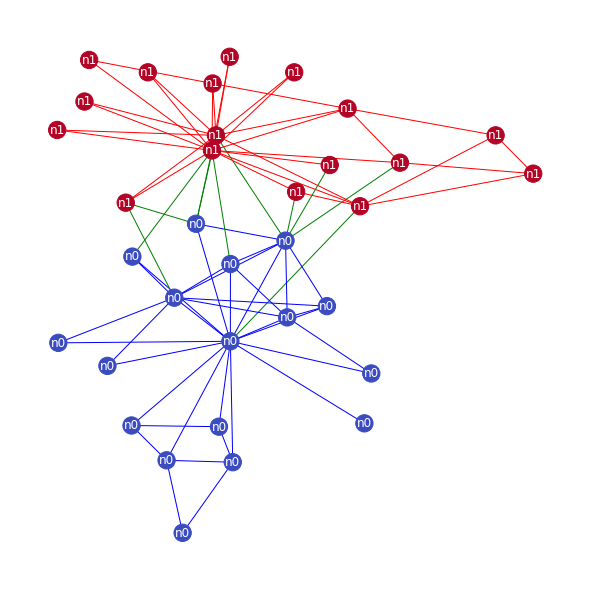

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color, edge_color=edge_color, labels=node_type, font_color='white')
plt.show()

완성~

## 4-2. 외부 데이터 (Covid-19)
- patiend_id : the ID of the patient
- infected_by : the ID of who infected the patient
- sex : the sex of the patient
- age : the age of the patient  
...

In [ ]:
import pandas as pd

# load dataset
# [NeurIPS 2020] Data Science for COVID-19 (DS4C)
# https://www.kaggle.com/kimjihoo/coronavirusdataset/version/86

file_path = './PatientInfo.csv'
df = pd.read_csv(file_path, dtype={'patient_id': str, 'infected_by':str})
df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [ ]:
# drop rows where infected_by == NaN
df = df[~df.infected_by.isna()]
df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,female,50s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,43,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,male,20s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
9,1000000010,female,60s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000003,6,NaN,2020-02-05,2020-02-29,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,6100000104,female,70s,Korea,Gyeongsangnam-do,Sancheong-gun,etc,6100000097,NaN,2020-03-26,2020-03-31,NaN,NaN,released
5123,6100000111,male,20s,Korea,Gyeongsangnam-do,Sacheon-si,contact with patient,6100000108,NaN,2020-04-04,2020-04-06,NaN,NaN,released
5124,6100000112,male,60s,Korea,Gyeongsangnam-do,Hapcheon-gun,contact with patient,6100000100,NaN,2020-04-03,2020-04-07,NaN,NaN,released
5126,6100000114,female,0s,Korea,Gyeongsangnam-do,Jinju-si,overseas inflow,6100000103,NaN,2020-04-01,2020-04-08,NaN,NaN,released


## Build Graph

In [ ]:
g = nx.DiGraph(
    df.loc[:, ('infected_by', 'patient_id')].values.tolist()
    )

In [ ]:
g.number_of_nodes(), g.number_of_edges()

(1717, 1346)

In [ ]:
node_id = '1000000003'
g.nodes[node_id]

{}

## Add Attribute

In [ ]:
gender_dict = {}
pid_list = list(df['patient_id'])
gender_list = list(df['sex'])

for i in range(len(df)):
    if type(gender_list[i]) != str:
        gender_list[i] = 'nan' # gender 값이 null인 경우 'nan'으로 할당.
    gender_dict[pid_list[i]] = gender_list[i]

In [ ]:
# gender_dict

In [ ]:
# graph node에 차례대로 할당. (female, male, nan)
for node_id in g.nodes():
    if gender_dict.get(node_id):
        g.nodes[node_id]['gender'] = gender_dict[node_id]
    else:
        g.nodes[node_id]['gender'] = 'nan'

In [ ]:
for node in g.nodes(data=True):
    print(node)
    break

('2002000001', {'gender': 'nan'})


In [ ]:
nx.write_graphml_lxml(g, "practice_covid_graph.graphml")

## [Gephi] Visualization Tool for Large Graph
- Download : https://gephi.org/users/download/
- Open Graph
- Set Layout
- Change Appearance
- Check Network Property

# 5.  실습 확인 코드 (빈칸 채워서 제출해주세요.)

## 5-1. 왼쪽 그래프를 NetworkX로 정의해봅시다. (아래 명세서 참고)
- 노드에는 feature, label attribute를 추가해주세요. 속성 값은 모두 노드 번호와 동일하게 정의해주세요.
- 엣지에는 weight attribute를 추가하고, 모든 엣지의 weight는 0.5로 추가해주세요.

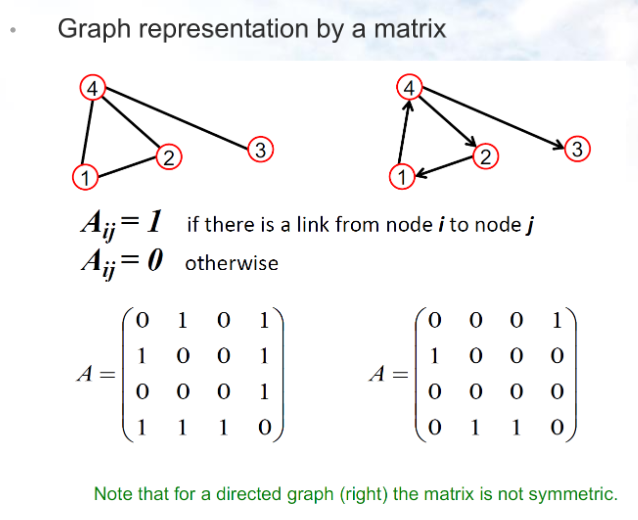

In [37]:
# Create an undirected graph G
G = nx.Graph()

In [38]:
# Add multiple nodes with attributes

G.add_nodes_from([
  (0, {"feature": 0, "label": 0}),
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2}),
  (3, {"feature": 3, "label": 3})
])

In [39]:
# Add edge with weight
G.add_edges_from([
  (0, 3, {"weight": 0.5}),
  (0, 1, {"weight": 0.5}),
  (1, 3, {"weight": 0.5}),
  (3, 2, {"weight": 0.5})
])


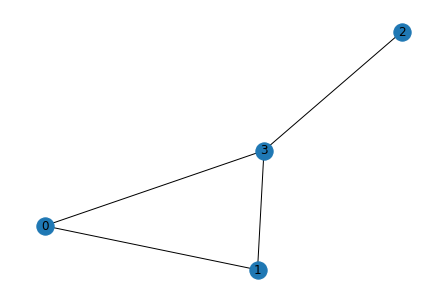

In [40]:
nx.draw(G, with_labels=True)

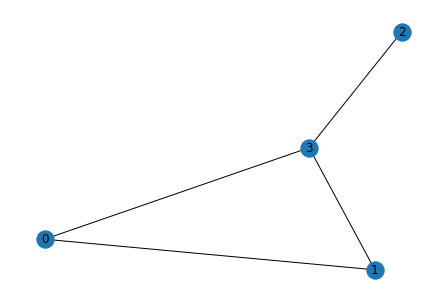

In [ ]:
# Draw the graph
#---- your code ----# 